##TRABAJO PRACTICO #2
####Grupo 6 - 2020 (cohorte 2)
*  Carlos Barcia
*  Damian Campana
*  Joel de Andres
*  Ará Berberian
*  Marcelo Tisera
*  Daniel Gonzalez

<h3>Limpieza y curación de datos</h3>

1. Abrir archivo y graficarlo

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from hashlib import md5

import sys
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

if 'ftfy' not in sys.modules:
    !pip install 'ftfy<5.6'

In [ ]:
BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"

In [ ]:
# Se abre y lee archivo .csv
tabla_1 = pd.read_csv(BASE_DIR + "/input/wtageinf.csv")
# Muestro los primero 10 registros
tabla_1.head(10)

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878
5,1,4.5,0.219867,7.041836,0.121040,5.575169,5.744752,6.013716,6.484969,7.041836,7.635323,8.202193,8.556813,8.793444
6,1,5.5,0.077506,7.630425,0.118271,6.096775,6.272175,6.551379,7.043627,7.630425,8.262033,8.871384,9.255615,9.513307
7,1,6.5,-0.021908,8.162951,0.116154,6.564430,6.745993,7.035656,7.548346,8.162951,8.828786,9.475466,9.885436,10.161350
8,1,7.5,-0.089441,8.644832,0.114510,6.984123,7.171952,7.472021,8.004399,8.644832,9.341490,10.021014,10.453314,10.744924
9,1,8.5,-0.133409,9.081120,0.113217,7.361236,7.555287,7.865533,8.416719,9.081120,9.805593,10.514064,10.965736,11.270838


[]

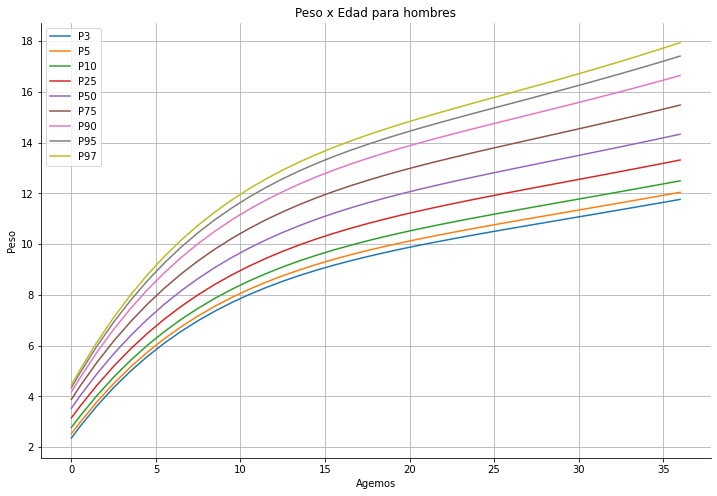

In [ ]:
#hombres
filtrado= tabla_1[tabla_1.Sex==1]

plt.figure(figsize=(12,8))

sb.lineplot( data= filtrado, x=filtrado.Agemos, y=filtrado.P3, label="P3")
sb.lineplot( data= filtrado, x=filtrado.Agemos, y=filtrado.P5, label="P5" )
sb.lineplot( data= filtrado, x=filtrado.Agemos, y=filtrado.P10, label="P10" )
sb.lineplot( data= filtrado, x=filtrado.Agemos, y=filtrado.P25, label="P25" )
sb.lineplot( data= filtrado, x=filtrado.Agemos, y=filtrado.P50, label="P50" )
sb.lineplot( data= filtrado, x=filtrado.Agemos, y=filtrado.P75, label="P75" )
sb.lineplot( data= filtrado, x=filtrado.Agemos, y=filtrado.P90, label="P90" )
sb.lineplot( data= filtrado, x=filtrado.Agemos, y=filtrado.P95, label="P95" )
sb.lineplot( data= filtrado, x=filtrado.Agemos, y=filtrado.P97, label="P97" )

plt.title("Peso x Edad para hombres")
sb.despine()
plt.ylabel("Peso")
plt.grid()
plt.plot()

[]

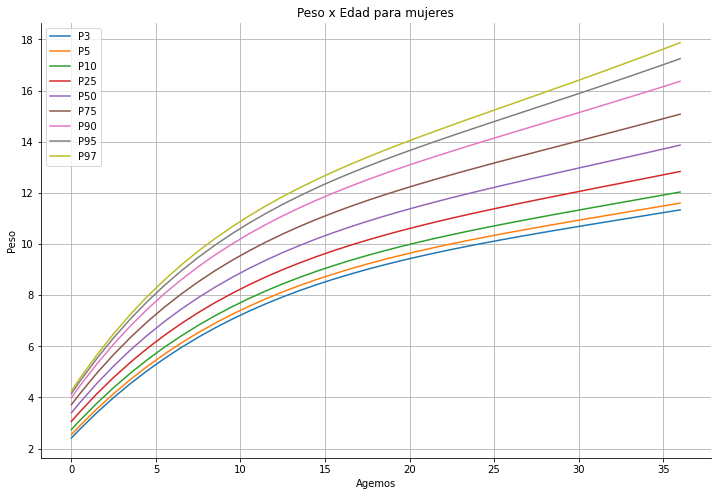

In [ ]:
#mujeres
filtrado_m = tabla_1[tabla_1.Sex==2]

plt.figure(figsize=(12,8))

sb.lineplot( data= filtrado_m, x=filtrado_m.Agemos, y=filtrado_m.P3, label="P3")
sb.lineplot( data= filtrado_m, x=filtrado_m.Agemos, y=filtrado_m.P5, label="P5" )
sb.lineplot( data= filtrado_m, x=filtrado_m.Agemos, y=filtrado_m.P10, label="P10" )
sb.lineplot( data= filtrado_m, x=filtrado_m.Agemos, y=filtrado_m.P25, label="P25" )
sb.lineplot( data= filtrado_m, x=filtrado_m.Agemos, y=filtrado_m.P50, label="P50" )
sb.lineplot( data= filtrado_m, x=filtrado_m.Agemos, y=filtrado_m.P75, label="P75" )
sb.lineplot( data= filtrado_m, x=filtrado_m.Agemos, y=filtrado_m.P90, label="P90" )
sb.lineplot( data= filtrado_m, x=filtrado_m.Agemos, y=filtrado_m.P95, label="P95" )
sb.lineplot( data= filtrado_m, x=filtrado_m.Agemos, y=filtrado_m.P97, label="P97" )


plt.title("Peso x Edad para mujeres")

sb.despine()
plt.ylabel("Peso")
plt.grid()
plt.plot()

2. Levantamos archivo de pasos fronterizos

In [ ]:
datos = pd.read_json(BASE_DIR + '/input/pasos.json')
datos.head(3)

,province,location,name
0,Tierra del Fuego,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA )
1,Tierra del Fuego,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA
2,Tierra del Fuego,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA)


In [ ]:
# agrupado de registros por columan provincia e indicando que cuente la cantidad
# de registros NAME que tiene cada provincia
datos_agrupados = datos.groupby(by='province')['name'].count()
datos_agrupados.reset_index()
# ordenamos los datos de mayor a menor
datos_agrupados = datos_agrupados.sort_values(axis=0, ascending=False)

[]

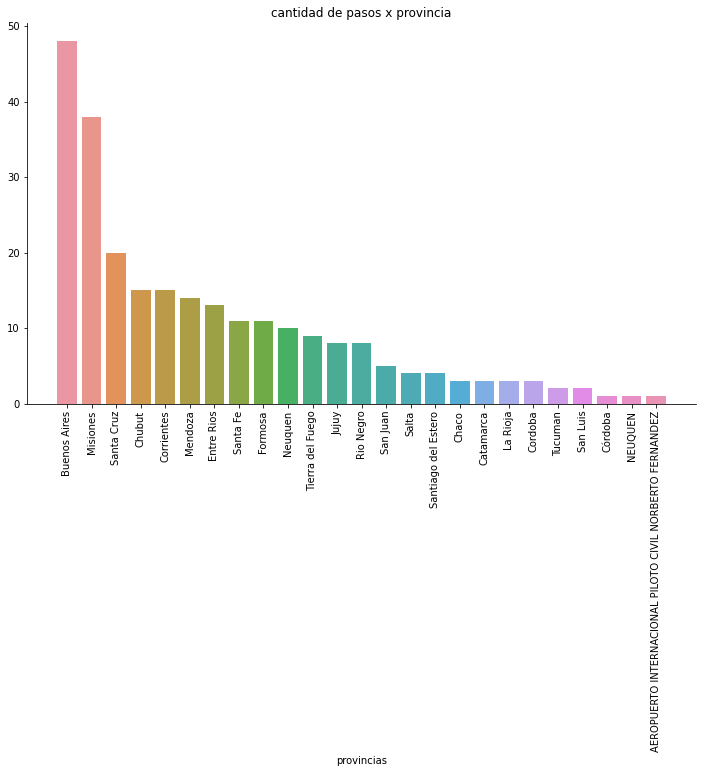

In [ ]:
#graficamos barras
plt.figure(figsize=(12,7))

sb.barplot(x=datos_agrupados.index, y=datos_agrupados.values)

# ajuste estetico
plt.xticks(rotation=90)
sb.despine()
plt.title("cantidad de pasos x provincia")
plt.xlabel("provincias")
plt.plot()

Se encuentra un valor fuera de lugar ya que la provincia de "Neuquen" se encuentra en mayúsculas y minúsculas y otro todo mayúsuculas

3. Nodos

Se grafica nodos como matriz y como lista de adyacencia

In [ ]:
#matriz
A = [ 
        [0,   0 ,  1,  0,  0,  0],
        [0,   0,   0,  1,  0,  0],
        [0,   0,   0,  1,  1,  0],
        [0,   0,   0,  0,  0,  1],
        [0,   0,   0,  0,  0,  1],
        [0,   0,   0,  0,  0,  0]
    ]
A   

[[0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0]]

In [ ]:
# Lista de adyacencia
adjList =[ [2], [3], [3,4], [5], [5],[] ]
adjList

[[2], [3], [3, 4], [5], [5], []]

4. Control de datos duplicados

Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados. 

In [ ]:
kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"],
                               index_col=['ID'])

In [ ]:
#armo tabla de registros duplicados x nombre
df_duplicado  = kickstarter_2018[kickstarter_2018.name.duplicated()]
# orden por nombre y fecha
df_duplicado = df_duplicado.sort_values(by=['name','launched' ])
#muestro el resultado
df_duplicado

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.0,2013-12-19 21:51:50,0.0,canceled,0,US,0.00,0.00,6500.00
713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.0,2013-01-26 03:51:47,1417.0,failed,26,US,1417.00,1417.00,5000.00
422509694,"""American Sports Stories"" - An Athletic Quest",Television,Film & Video,USD,2017-05-14,100000.0,2017-04-14 00:08:52,1.0,failed,1,US,25.00,1.00,100000.00
866225086,"""City of Mercy"" (Canceled)",Film & Video,Film & Video,USD,2015-02-26,20000.0,2015-01-27 19:30:43,7248.0,canceled,9,US,7248.00,7248.00,20000.00
870322805,"""Color"" Music Video",Music,Music,USD,2015-09-16,1100.0,2015-09-02 00:03:02,1100.0,undefined,0,"N,0""",NaN,1100.00,1100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58345768,x (Canceled),Children's Books,Publishing,USD,2016-07-24,15000.0,2016-05-25 06:48:32,0.0,canceled,0,US,0.00,0.00,15000.00
329580179,xxx (Canceled),Art,Art,USD,2011-09-03,10000.0,2011-06-05 04:54:37,1151.0,canceled,18,US,1151.00,1151.00,10000.00
796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


In [ ]:
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()



# poner el valor hash en una nueva columna del dataframe original
kickstarter_2018['name_hash'] = kickstarter_2018['name'].apply(hashit)

In [ ]:
kickstarter_2018.sample(4)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_hash
ID,,,,,,,,,,,,,,,
689363828,ImaginMe Augmented Reality Avatars,Apps,Technology,USD,2017-12-31,20000.0,2017-12-01 13:55:27,1365.0,failed,10,US,737.0,1365.0,20000.0,e8793b35480ac5ccad8ed62f1a1e5a6a
567180154,Wear to Go,Apps,Technology,USD,2015-05-21,10000.0,2015-04-21 20:48:14,50.0,failed,1,US,50.0,50.0,10000.0,4843e0aef69f50310bcf42decbda20a2
566452174,Where the Cicadas Chirp,Shorts,Film & Video,USD,2014-07-16,2000.0,2014-06-22 06:43:20,2005.0,successful,10,US,2005.0,2005.0,2000.0,6c57d0c2506bcd53ea58212a34885c29
733093009,I Believe,Theater,Theater,USD,2012-06-05,2500.0,2012-04-06 23:46:50,2512.0,successful,37,US,2512.0,2512.0,2500.0,e3a18ab4a1e3d7045a43d74db92b3fd6


5. 
Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

In [ ]:
#armo tabla de registros duplicados x nombre con hash aplicado
df_duplicado_hash  = kickstarter_2018[kickstarter_2018.name_hash.duplicated(keep=False)]


df_duplicado_hash = df_duplicado_hash.sort_values(by=['name_hash','name' ])
#muestro el resultado
df_duplicado_hash_cols = df_duplicado_hash[['name', 'name_hash', 'category']]
df_duplicado_hash_cols

,name,name_hash,category
ID,,,
1738342791,The Show Must Go On,0009d8d70380e624d4cf110b4c72de31,Theater
615820379,The Show Must Go On,0009d8d70380e624d4cf110b4c72de31,Documentary
378887824,New Dawn,0034d4a8f7a8799c35ddffc5491a7a93,Video Games
87476798,New Dawn,0034d4a8f7a8799c35ddffc5491a7a93,Tabletop Games
109886636,James vs The New World Order #3,00550f449fd8ddcb3f55e2e49b4a2db6,Comics
...,...,...,...
868693865,Free Education,ffe1a5d43151c4168934680b9199d786,Technology
1848699072,NaN,nan,Narrative Film
634871725,NaN,nan,Video Games


6. Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [ ]:
import ftfy.badness as bad

def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

In [ ]:
#kickstarter_2016 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201612.csv", encoding='Windows-1252')
prueba_kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv",encoding="iso-8859-1")

prueba_kickstarter_2018.head()

prueba_kickstarter_2018['name_weirdness'] = prueba_kickstarter_2018['name'].apply(weird)
resultado_iso8859_1 = prueba_kickstarter_2018[prueba_kickstarter_2018['name_weirdness'] > 1]
resultado_iso8859_1

###Codificar variables

7. Codificar ***currency*** con ambas estrategias

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer

In [ ]:
column='currency'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])

# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))

In [ ]:
# Apply the fitted encoder to the pandas column
kickstarter_2018['currency_transform'] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.sample(3)

In [ ]:
other_column = 'currency'

#creo el obj LabelBinarizer
lb = LabelBinarizer()

In [ ]:
# el obj LB transforma el array en matriz de ceros y unos [0, 1] para cada ocurrencia de las categorias
# lb.fit_transform(kickstarter_2018[other_column]

# concateno los dataframe para que esa variable CURRENCY este como matris de [ 0, 1]
# se asigna labels de la clase y mismo indice

kickstarter_2018_new = kickstarter_2018.join(pd.DataFrame(lb.fit_transform(kickstarter_2018[other_column]),
                                                          columns=lb.classes_, 
                                                          index=kickstarter_2018.index))

In [ ]:
# matriz separada con el resultado de lb.fit_transform(kickstarter_2018[other_column])
'''
lb_results = lb.fit_transform(kickstarter_2018[other_column])
nuevas_col = pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_)))
nuevas_col.columns
'''

In [ ]:
kickstarter_2018_new.sample(3)

In [ ]:
# verifico si existen proyectos que no esten en "USD"
kickstarter_2018_new[kickstarter_2018_new.USD == 0].sample(3)
 

### Reglas de integridad
8. Verificar la consistencia de las variables

    1. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?


In [ ]:
cant_exitos = len(kickstarter_2018[(kickstarter_2018.state == 'successful')])

cant_exitos_menos_dinero = len(kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)])
cant_exitos_mas_dinero = len(kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged >= kickstarter_2018.goal)])

porc_exitos_menos = cant_exitos_menos_dinero/cant_exitos
porc_exitos_mas = cant_exitos_mas_dinero/cant_exitos


In [ ]:
print(f"Proyectos exitosos que no alcanzaron el objetivo: {cant_exitos_menos_dinero}")
print()
print(f"% Proyectos exitosos sin alcanzar el objetivo: {round(porc_exitos_menos*100,4)}%" )
print(f"% Proyectos exitosos alcanzando/superando el objetivo: {round(porc_exitos_mas*100,4)}%" )


Proyectos exitosos que no alcanzaron el objetivo: 5

% Proyectos exitosos sin alcanzar el objetivo: 0.0037%
% Proyectos exitosos alcanzando/superando el objetivo: 99.9963%


2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [ ]:
df_agrupado = kickstarter_2018.groupby(['main_category', 'state'])['name'].count().reset_index()
df_agrupado

3. Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

In [ ]:
kickstarter_2018.category.unique()

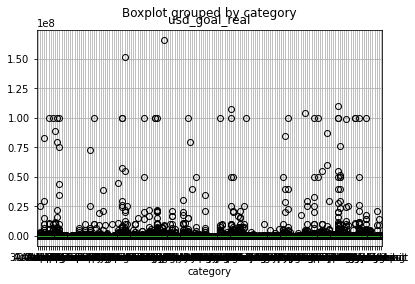

In [ ]:
kickstarter_2018.boxplot(column='usd_goal_real',by='category');

In [ ]:
#formula para armar una tabla con registros outliers

outliers_cat = kickstarter_2018[kickstarter_2018.usd_goal_real > (kickstarter_2018.usd_goal_real.mean() + 
                                                            3 * kickstarter_2018.usd_goal_real.std())]

#visualizar resultado
outliers_cat

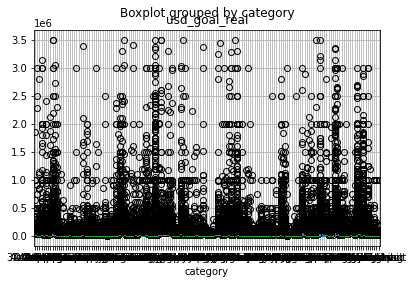

In [ ]:
#grafico en pandas el dataframe con un DROP (quitando valores) de los registros outliers
kickstarter_2018.drop(outliers_cat.index).boxplot(column='usd_goal_real',by='category');

In [ ]:
df_limpio = kickstarter_2018.drop(outliers_cat.index)
df_limpio

[]

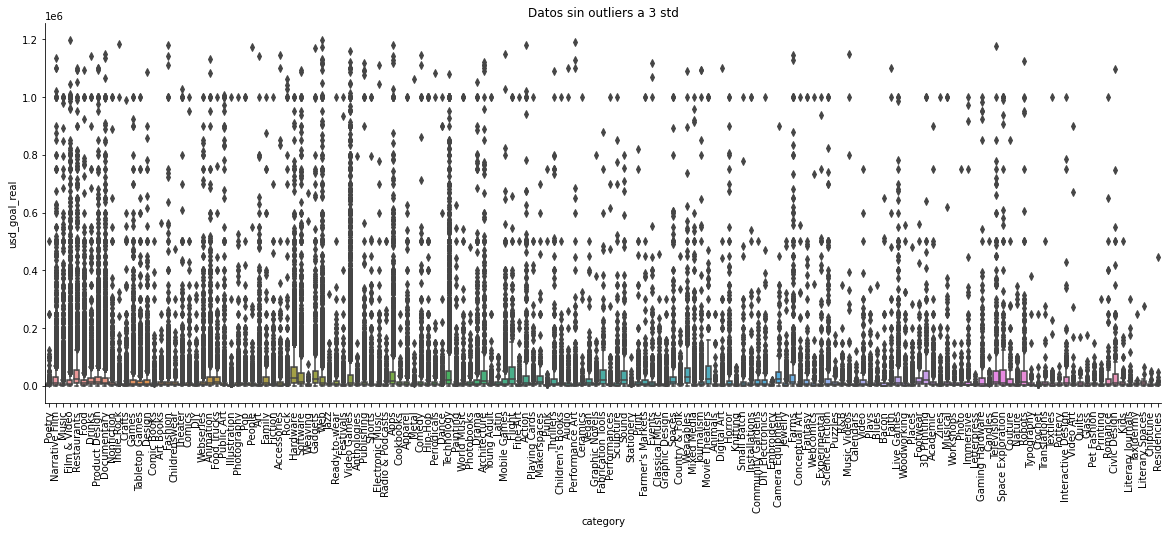

In [ ]:
plt.figure(figsize=(20,7))
sb.boxplot(data=df_limpio,x=df_limpio.category,y=df_limpio.usd_goal_real)
plt.xticks(rotation=90)
sb.despine()
plt.title("Datos sin outliers a 3 std")
plt.plot()

### Acceso a Sqlite


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
my_path = '/content/drive/My Drive/'

#importacion de la libreria
import sqlite3

# db = objeto de conexion de la base de dato al path + chinoOk.db
db = sqlite3.connect(my_path + 'chinook.db')

In [ ]:
def get_dataframe_from_sql(sql,dbconnection):
    datos_sql = pd.read_sql(_sql,dbconnection)
    return datos_sql

1. mostrar canciones de Iron Maiden

In [ ]:
# cargo un dataframe de pandas con una consulta SQL
_sql = '''
select a.ArtistId,
       a.name nombreArtista,
	   m.Title nombreAlbum,
	   t.name nombreCancion
from artists a
inner join albums m on a.ArtistId=m.ArtistId
inner join tracks t on t.TrackId=m.AlbumId
where a.name='Iron Maiden';
'''
get_dataframe_from_sql(_sql, db)


,ArtistId,nombreArtista,nombreAlbum,nombreCancion
0,90,Iron Maiden,A Matter of Life and Death,Hypnotize
1,90,Iron Maiden,A Real Dead One,Bring'em Back Alive
2,90,Iron Maiden,A Real Live One,Light My Way
3,90,Iron Maiden,Brave New World,Getaway Car
4,90,Iron Maiden,Dance Of Death,The Last Remaining Light
5,90,Iron Maiden,Fear Of The Dark,Your Time Has Come
6,90,Iron Maiden,Iron Maiden,Out Of Exile
7,90,Iron Maiden,Killers,Be Yourself
8,90,Iron Maiden,Live After Death,Doesn't Remind Me
9,90,Iron Maiden,Live At Donington 1992 (Disc 1),Drown Me Slowly


1. Discos con más de 25 canciones

In [ ]:
_sql = '''
select a.Title, a2.Name , count(*) as cantidad_tracks
from albums a 
inner join tracks t  on a.AlbumId  = t.AlbumId 
inner join artists a2 on a.ArtistId = a2.ArtistId 
GROUP by a.AlbumId 
HAVING  count(t.TrackId ) > 25;
'''
get_dataframe_from_sql(_sql, db)


,Title,Name,cantidad_tracks
0,Minha Historia,Chico Buarque,34
1,Unplugged,Eric Clapton,30
2,Greatest Hits,Lenny Kravitz,57
3,"Lost, Season 3",Lost,26


3. 10 Canciones más populares

In [ ]:
_sql = '''
select pt.TrackId, t2.Name ,count(pt.TrackId) as cant_en_playlist 
from playlist_track pt 
inner join tracks t2 
    on t2.TrackId  = pt.TrackId  
group by pt.TrackId  
order by 3 desc limit 10
'''
get_dataframe_from_sql(_sql, db)

,TrackId,Name,cant_en_playlist
0,3403,Intoitus: Adorate Deum,5
1,3404,"Miserere mei, Deus",5
2,3408,"Aria Mit 30 Veränderungen, BWV 988 ""Goldberg V...",5
3,3409,"Suite for Solo Cello No. 1 in G Major, BWV 100...",5
4,3410,"The Messiah: Behold, I Tell You a Mystery... T...",5
5,3411,Solomon HWV 67: The Arrival of the Queen of Sheba,5
6,3415,Symphony No.5 in C Minor: I. Allegro con brio,5
7,3416,Ave Maria,5
8,3417,"Nabucco: Chorus, ""Va, Pensiero, Sull'ali Dorate""",5
9,3418,Die Walküre: The Ride of the Valkyries,5


In [ ]:
#cierro la conexion a la base de datos
db.close()

### Leer datos desde webservices

In [ ]:
# para leer RSS
!pip install 'feedparser'

     |████████████████████████████████| 194kB 2.8MB/s 
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=ae7c7ffc6a5796accaaa4e5a2b055e9a6e09100ec096805628a6cb1395cd8866
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
Successfully built feedparser


In [ ]:
import feedparser

In [ ]:
# obtiene del webservice toda la estructura del rss
rss = feedparser.parse('https://www.lavoz.com.ar/rss/tecnologia.xml')

In [ ]:
# iteramos por el obj para obtener los titulos de cada 'entrie'
for e in rss.entries: 
    print('* ' + e.title)

* Con el 5G aún en pañales, Samsung tiene fecha estimada para la llegada del 6G
* Descubren una app de chat para Android que espía a los usuarios y roba sus datos
* Venden un Súper Mario Bros de 1985 precintado por U$S 114.000 y se convierte en el juego más caro del mundo
* Apple aconseja no usar protectores para tapar la webcam de los MacBook: qué alternativas propone
* Un ratito más: la pulsera de Fitbit despertará a los usuarios "en el mejor momento"
* ¿TikTok es divertido? El mundo lo ve como un asunto muy serio y con razón
* Instagram prohibirá publicidades de "terapias de conversión" para personas LGTB
* Microsoft toma el control de los dominios que usaban la Covid como anzuelo para estafas
* Microsoft Teams: ahora los que estén en una videollamada podrán verse "uno al lado del otro"
* Instagram permite fijar hasta tres comentarios en una publicación
* Google Maps empieza a mostrar los semáforos en Android
* TikTok se retirará en los próximos días de Hong Kong y EE.UU. estudia pr